<a href="https://www.kaggle.com/code/vedatgul/titanic-survival-prediction-with-ml?scriptVersionId=127429785" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

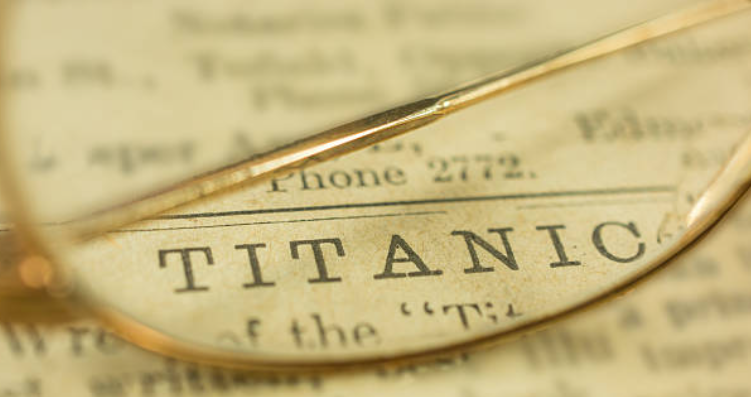

# <span style="color:#2D7680"> Table of Contents </span>

[<span style="color:#2D7680">   1. Examine the Dataset  </span>](#Exa)

[<span style="color:#2D7680">   2. Data Preparation </span>](#Dat)

[<span style="color:#2D7680">   3. Data Analysis   </span>](#Ana)

[<span style="color:#2D7680">   4. Missing Values  </span>](#Mis)

[<span style="color:#2D7680">   5. Encoding  </span>](#Enc)

[<span style="color:#2D7680">   6. Modelling  </span>](#Mod)

##  <span style="color:#2D7680"> 1. Examine the Dataset </span> <a class="anchor" id="Exa"></a> 

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).



**survival:** Survival	  
**pclass:**	  Ticket class	   
**sex:**	  Sex	
**Age:**	  Age in years	
**sibsp:**	  of siblings / spouses aboard the Titanic	
**parch:**	  of parents / children aboard the Titanic	
**ticket:**	  Ticket number	
**fare:**	  Passenger fare	
**cabin:**	  Cabin number	
**embarked:** Port of Embarkation	

##  <span style="color:#2D7680"> 2. Data Preparation </span> <a class="anchor" id="Dat"></a> 

In [1]:
# Loading the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Uploading training data

train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Uploading test data

test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
sub_id=test_data["PassengerId"]

In [5]:
row_train = train_data.shape[0]
all_data = pd.concat([train_data, test_data]).reset_index()

In [6]:
all_data

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
all_data = all_data.drop(['PassengerId', 'index'], axis=1)

In [8]:
all_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 112.6+ KB


In [10]:
all_data.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [11]:
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292



##  <span style="color:#2D7680"> 3. Data Analysis </span> <a class="anchor" id="Ana"></a>

In [12]:
# Analyzing variables 

def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    # 1- Categorical variables
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    
    # 2- Numeric but actually categorical (class)
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                        dataframe[col].dtypes != "O"]
    
    # 3 - Categorical but actually each cardinal, that is, unique
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                        dataframe[col].dtypes == "O"]
    
    # 4 - Collect the cat_cols and num_but_cat variables
    cat_cols = cat_cols + num_but_cat
    
    # 5- Subtract the cardinal variable from cat_cols
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [13]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(all_data)

Observations: 1309
Variables: 11
cat_cols: 6
num_cols: 2
cat_but_car: 3
num_but_cat: 4


In [14]:
# Filling in blank lines
all_data['Age'].fillna(all_data['Age'].mean(), inplace=True)
all_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##  <span style="color:#2D7680"> 4. Missing Values </span> <a class="anchor" id="Mis"></a> 

In [15]:
print(all_data['Embarked'].mode()[0])

S


In [16]:
all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace=True)

In [17]:
#Converting the categorical features 'Sex' and 'Embarked' into numerical values 0 & 1

all_data.replace({'Sex': {'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)
all_data['Fare'].fillna(all_data['Fare'].dropna().median(), inplace=True)
all_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [18]:
all_data['Age'].fillna(all_data['Age'].mean(), inplace=True)
all_data.replace({'Sex': {'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)
all_data['Fare'].fillna(all_data['Fare'].dropna().median(), inplace=True)
all_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [19]:
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.000000,3.000,3.0000
Sex,1309.0,0.355997,0.478997,0.00,0.0000,0.000000,1.000,1.0000
Age,1309.0,29.881138,12.883193,0.17,22.0000,29.881138,35.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.000000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.000000,0.000,9.0000
Fare,1309.0,33.281086,51.741500,0.00,7.8958,14.454200,31.275,512.3292
Embarked,1309.0,0.394194,0.653499,0.00,0.0000,0.000000,1.000,2.0000


In [20]:
all_data=all_data.drop(columns=["Name","Ticket","Cabin", 'SibSp', 'Parch'])
all_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0.0,3,0,22.0,7.2500,0
1,1.0,1,1,38.0,71.2833,1
2,1.0,3,1,26.0,7.9250,0
3,1.0,1,1,35.0,53.1000,0
4,0.0,3,0,35.0,8.0500,0


In [21]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(all_data)

Observations: 1309
Variables: 6
cat_cols: 4
num_cols: 2
cat_but_car: 0
num_but_cat: 4


In [22]:
cat_cols.remove("Survived")

In [23]:
num_cols

['Age', 'Fare']

In [24]:
cat_cols

['Pclass', 'Sex', 'Embarked']

##  <span style="color:#2D7680"> 5. Encoding </span> <a class="anchor" id="Enc"></a> 

In [25]:
# Encoding 

def label_encoder(dataframe, binary_cols):
    dataframe[binary_cols] = LabelEncoder().fit_transform(dataframe[binary_cols])
    return dataframe

binary_cols = [col for col in all_data.columns if all_data[col].dtype == "O" and all_data[col].nunique() == 2]
for col in binary_cols:
    all_data = label_encoder(all_data, col)
    

# OneHot encoder

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

cols = [col for col in all_data.columns if 11 >= all_data[col].nunique() > 2]

df2 = one_hot_encoder(all_data, cols)

df2.head()

,Survived,Sex,Age,Fare,Pclass_2,Pclass_3,Embarked_1,Embarked_2
0,0.0,0,22.0,7.2500,0,1,0,0
1,1.0,1,38.0,71.2833,0,0,1,0
2,1.0,1,26.0,7.9250,0,1,0,0
3,1.0,1,35.0,53.1000,0,0,0,0
4,0.0,0,35.0,8.0500,0,1,0,0


In [26]:
rs = StandardScaler()
df2[num_cols] = rs.fit_transform(df2[["Age","Fare"]])

In [27]:
df2

,Survived,Sex,Age,Fare,Pclass_2,Pclass_3,Embarked_1,Embarked_2
0,0.0,0,-0.611972,-0.503291,0,1,0,0
1,1.0,1,0.630431,0.734744,0,0,1,0
2,1.0,1,-0.301371,-0.490240,0,1,0,0
3,1.0,1,0.397481,0.383183,0,0,0,0
4,0.0,0,0.397481,-0.487824,0,1,0,0
...,...,...,...,...,...,...,...,...
1304,NaN,0,0.000000,-0.487824,0,1,0,0
1305,NaN,1,0.708081,1.462034,0,0,1,0
1306,NaN,0,0.669256,-0.503291,0,1,0,0
1307,NaN,0,0.000000,-0.487824,0,1,0,0


##  <span style="color:#2D7680"> 6. Modelling </span> <a class="anchor" id="Mod"></a> 

In [28]:
# Separating Train and Test data

train = df2[:row_train]
test_1 = df2[row_train:]

In [29]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [31]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
acc_log = round(model.score(X_train, y_train) * 100, 2)
acc_log

79.63

In [32]:
# CatBoost
cb_model = CatBoostRegressor(loss_function='RMSE', logging_level='Silent')
cb_model.fit(X_train, y_train)
preds = cb_model.predict(X_test) 

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 0.23281898712059407
MSE: 0.11624460128212505
RMSE: 0.3409466252687142


In [34]:
liner_r2_score=r2_score(y_test, preds)
liner_r2_score

0.5165377375804039

In [35]:
train.head()

,Survived,Sex,Age,Fare,Pclass_2,Pclass_3,Embarked_1,Embarked_2
0,0.0,0,-0.611972,-0.503291,0,1,0,0
1,1.0,1,0.630431,0.734744,0,0,1,0
2,1.0,1,-0.301371,-0.490240,0,1,0,0
3,1.0,1,0.397481,0.383183,0,0,0,0
4,0.0,0,0.397481,-0.487824,0,1,0,0


In [36]:
test_1.head()

,Survived,Sex,Age,Fare,Pclass_2,Pclass_3,Embarked_1,Embarked_2
891,NaN,0,0.358655,-0.492093,0,1,0,1
892,NaN,1,1.329283,-0.508125,0,1,0,0
893,NaN,0,2.494035,-0.456164,1,0,0,1
894,NaN,0,-0.223721,-0.475981,0,1,0,0
895,NaN,1,-0.611972,-0.405895,0,1,0,0


In [37]:
test_1=test_1.drop("Survived",axis=1)

In [38]:
Sub = model.predict(test_1)

In [39]:
Sub

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [40]:
submission = pd.DataFrame({
        "PassengerId": sub_id,
        "Survived": Sub
    })

print(submission)

     PassengerId  Survived
0            892       0.0
1            893       0.0
2            894       0.0
3            895       0.0
4            896       1.0
..           ...       ...
413         1305       0.0
414         1306       1.0
415         1307       0.0
416         1308       0.0
417         1309       0.0

[418 rows x 2 columns]


In [41]:
submission.to_csv('submission.csv',index=False)